In [1]:
print('Hello World!')

Hello World!


In [2]:
import time
time.sleep(3)

In [3]:
def say_hello(recipient):
    return 'Hello,{}!'.format(recipient)
say_hello('Tim')

'Hello,Tim!'

In [4]:
import numpy as np
def square(x):
    return x*x


In [5]:
square(2)

4

Markdown Cell Comments

In [6]:
x=np.random.randint(1,10)
y=square(x)
print('%d squared is %d' %(x,y))

4 squared is 16


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="darkgrid")

In [8]:
df = pd.read_csv("/Users/xiaoxili/Downloads/fortune500.csv")

In [9]:
df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [10]:
df.head(3)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4


In [11]:
df.tail(3)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [12]:
df.columns=['year','rank','company','revenue','profit']

In [13]:
len(df)

25500

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [15]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head(3)

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.


In [16]:
set(df.profit[non_numeric_profits])

{'N.A.'}

In [17]:
len(df.profit[non_numeric_profits])

369

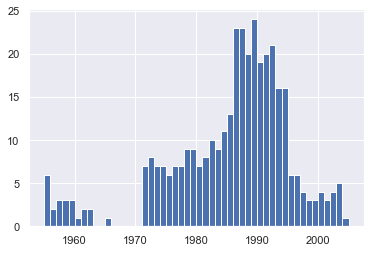

In [18]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits],bins=range(1955,2006))

In [19]:
df = df.loc[~non_numeric_profits]

In [20]:
df.profit = df.profit.apply(pd.to_numeric)

/Users/xiaoxili/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
len(df)

25131

In [22]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [23]:
group_by_year = df.loc[:,['year','revenue','profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x,y,ax,title,y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0,y=0)

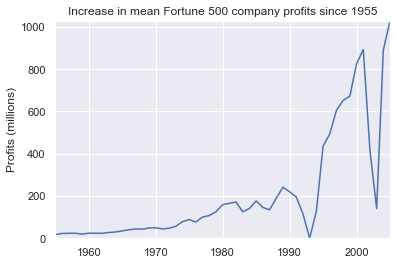

In [24]:
fig,ax = plt.subplots()
plot(x,y1,ax,'Increase in mean Fortune 500 company profits since 1955','Profits (millions)')

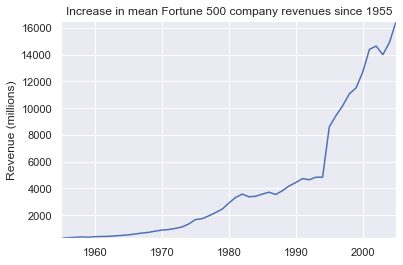

In [25]:
y2 = avgs.revenue
fig,ax = plt.subplots()
plot(x,y2,ax,'Increase in mean Fortune 500 company revenues since 1955','Revenue (millions)')

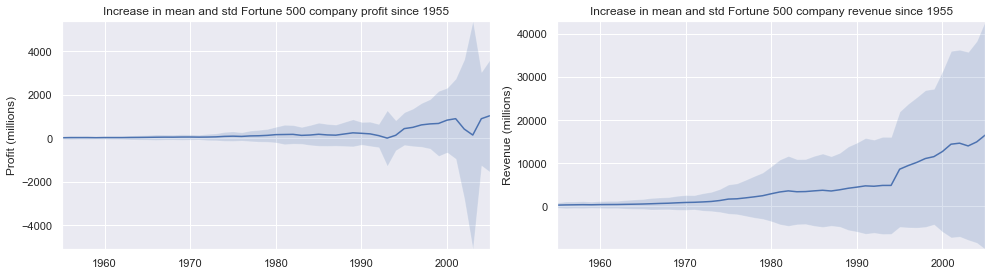

In [26]:
def plot_with_std(x,y,stds,ax,title,y_label):
    ax.fill_between(x,y-stds,y+stds,alpha=0.2)
    plot(x,y,ax,title,y_label)
fig,(ax1,ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s since 1955'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values,stds1,ax1,title % 'profit', 'Profit (millions)')
plot_with_std(x,y2.values,stds2,ax2,title % 'revenue', 'Revenue (millions)')
fig.set_size_inches(14,4)
fig.tight_layout()